- Author: Kirill Shumilov
- Date: 01/31/2025

# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
a, b = -1, 1

n = np.asarray([2, 4, 8, 16, 32]) + 1


def f1(x):
    return np.exp(x)


true_int1 = f1(b) - f1(a)


@np.vectorize
def f2(x):
    if x < 0.25:
        return np.exp(-x + 0.25)

    return np.exp(x - 0.25)


true_int2 = -(f2(0.25) - f2(a)) + (f2(b) - f2(0.25))

# Plot Functions of interest

In [3]:
x = np.linspace(a, b, 100)
y1 = f1(x)
y2 = f2(x)

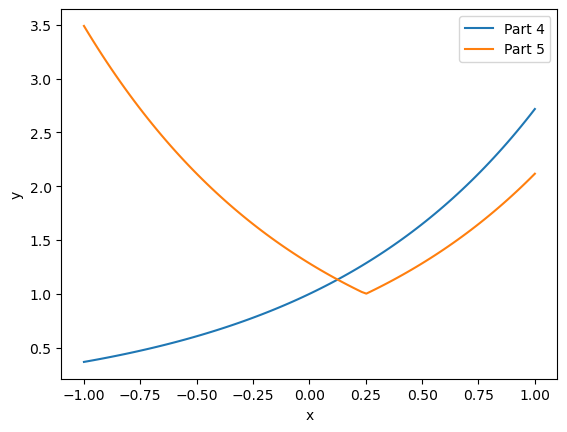

In [4]:
plt.plot(x, y1, label='Part 4')
plt.plot(x, y2, label='Part 5')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Read Data & Calculate Error

In [5]:
def calculate_error(df, true_int):
    for c in ['trap', 'simp', 'gaus']:
        df[f'{c}_err'] = np.abs(true_int - df[c])

df1 = pd.read_csv('data/part_4.csv', index_col=False)
df2 = pd.read_csv('data/part_5.csv', index_col=False)

calculate_error(df1, true_int1)
calculate_error(df2, true_int2)

# Plot Error

## Part 4

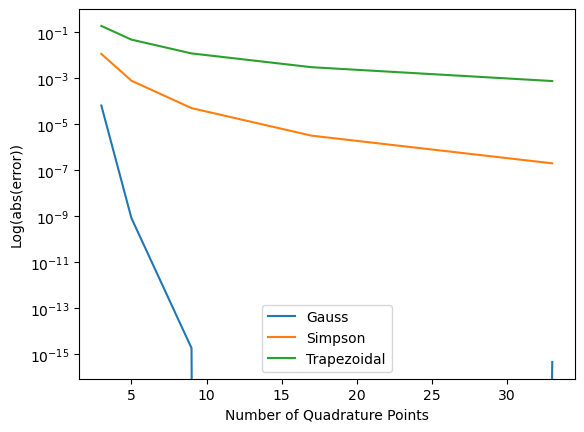

In [6]:
plt.plot('n', 'gaus_err', label='Gauss', data=df1)
plt.plot('n', 'simp_err', label='Simpson', data=df1)
plt.plot('n', 'trap_err', label='Trapezoidal', data=df1)
plt.yscale('log')
plt.legend()
plt.xlabel('Number of Quadrature Points')
plt.ylabel('Log(abs(error))')
plt.show()

### Comments

In the case of smooth differentiable function on the entire interval, we can see that Simpson and Trapezoidal methods decrease in error roughly at the same rate (an order of magnitude for each doubling of number of points). At the same time, the Gauss-Legendre Quadratures error decrease by roughly four orders per doubling of number of quadrature points.

## Part 5

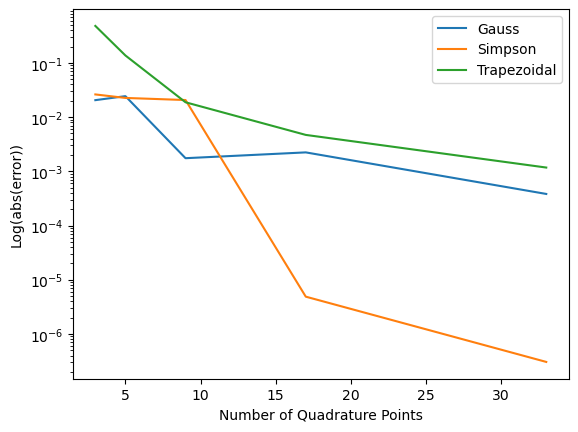

In [7]:
plt.plot('n', 'gaus_err', label='Gauss', data=df2)
plt.plot('n', 'simp_err', label='Simpson', data=df2)
plt.plot('n', 'trap_err', label='Trapezoidal', data=df2)
plt.yscale('log')
plt.legend()
plt.xlabel('Number of Quadrature Points')
plt.ylabel('Log(abs(error))')
plt.show()

### Comments

In the case of continuous, but not differentiable function (it has a kink at x=0.25), the overall perfomance is drastically worsened across the board. The Gauss-Legendre and Trapezoidal quadratures perform similarly, while simpson quadrature outperforms the two in the long run. Since the function is not differentiable everywhere, Gauss-Legendre quadrature struggles to correctly approximate function using a basis set of Legendre polynomials, which are defined for the entire interval. This means that failure to approximate "the kink" propagates to the entire interval. Thus composite rules should, in principle, perform better, because they do not rely on the entire interval to approximate the function. However, Trapezoidal Quadrature is not flexible enough to approximate the function correctly in general. However, Simpson Quadrature is flexible enough to approximate the smooth parts of the function well enough and  "handle the kink" by confining the errors from it just two one interval, where it is located.